In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
File="./data/Removed_Null_personality_dataset.csv"
df=pd.read_csv(File)
df.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2900 non-null   int64  
 1   Time_spent_Alone           2900 non-null   float64
 2   Stage_fear                 2900 non-null   int64  
 3   Social_event_attendance    2900 non-null   float64
 4   Going_outside              2900 non-null   float64
 5   Drained_after_socializing  2900 non-null   int64  
 6   Friends_circle_size        2900 non-null   float64
 7   Post_frequency             2900 non-null   float64
 8   Personality                2900 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 204.0 KB


In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


<Axes: >

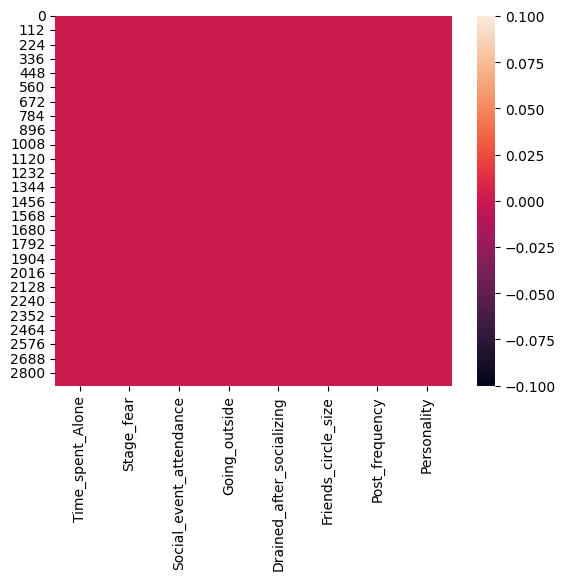

In [13]:
sns.heatmap(df.isnull())

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

y=df["Personality"]
X=df.drop("Personality",axis=1)

X_scaled=scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [35]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",gamma=0.1) 

In [36]:
model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_pred=model.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9264367816091954


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



AttributeError: This 'SVC' has no attribute 'predict_proba'